In [3]:
%matplotlib widget

from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
import ipywidgets as widgets
from sklearn.metrics import normalized_mutual_info_score as nmi

from amalgamate import amalgamate


from gqlalchemy import Memgraph

In [4]:
memgraph = Memgraph(host="localhost", port=7687)

In [5]:
nodes_query = f"""MATCH (n:Neuron)
    WITH n, rand() as r
    RETURN n.x as x, n.y as y, n.z as z, {", ".join([f"n.community_id_step{i} as c{i}" for i in range(101)])}
    ORDER BY r
    LIMIT 1000"""
nodes = list(memgraph.execute_and_fetch(nodes_query))
df = pd.DataFrame.from_dict(nodes)


MATCH (n:Neuron)
    WITH n, rand() as r
    RETURN n.x as x, n.y as y, n.z as z, n.community_id_step0 as c0, n.community_id_step1 as c1, n.community_id_step2 as c2, n.community_id_step3 as c3, n.community_id_step4 as c4, n.community_id_step5 as c5, n.community_id_step6 as c6, n.community_id_step7 as c7, n.community_id_step8 as c8, n.community_id_step9 as c9, n.community_id_step10 as c10, n.community_id_step11 as c11, n.community_id_step12 as c12, n.community_id_step13 as c13, n.community_id_step14 as c14, n.community_id_step15 as c15, n.community_id_step16 as c16, n.community_id_step17 as c17, n.community_id_step18 as c18, n.community_id_step19 as c19, n.community_id_step20 as c20, n.community_id_step21 as c21, n.community_id_step22 as c22, n.community_id_step23 as c23, n.community_id_step24 as c24, n.community_id_step25 as c25, n.community_id_step26 as c26, n.community_id_step27 as c27, n.community_id_step28 as c28, n.community_id_step29 as c29, n.community_id_step30 as c30, n.commun

In [6]:
df.x /= 10
df.y /= 10
df.z /= 10

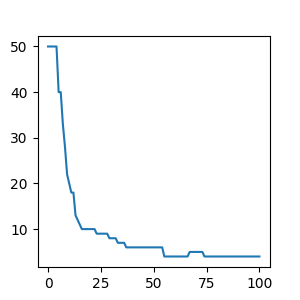

In [7]:

unique_coms = {}
for i in range(101):
    unique_coms[i] = len(set(getattr(df, f"c{i}")))

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(list(unique_coms.keys()), list(unique_coms.values()))
plt.show()

{1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 0.795095627865107, 6: 0.9816085885791367, 7: 0.9006056515749378, 8: 0.8910450653875691, 9: 0.9098846384092446, 10: 0.9256583688293334, 11: 0.9400486860399244, 12: 0.9535046382346918, 13: 0.9474157120268982, 14: 0.9368446200649884, 15: 0.953507888212378, 16: 0.9525696675117047, 17: 0.9418370083349353, 18: 0.9468506751945731, 19: 0.9475039514808347, 20: 0.9515235791372786, 21: 0.946734918453138, 22: 0.9532861482074544, 23: 0.9512177176822347, 24: 0.9742239186675428, 25: 0.9592471864348321, 26: 0.9557367225525019, 27: 0.9307071914342171, 28: 0.9222655119407648, 29: 0.9396603993673777, 30: 0.9570478619956666, 31: 0.9637905753276584, 32: 0.9519128850519981, 33: 0.9600744872084647, 34: 0.9605257233594193, 35: 0.9635566050824784, 36: 0.9532120150051343, 37: 0.9629402664681747, 38: 0.9590159072908441, 39: 0.9421050716840099, 40: 0.9603731131052897, 41: 0.9452790628829412, 42: 0.965208732014684, 43: 0.9554664988898833, 44: 0.9525460359061393, 45: 0.9206762149

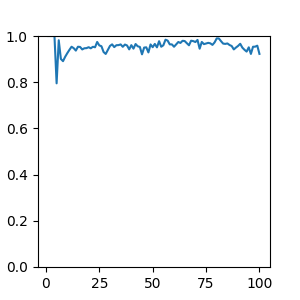

In [8]:
nmis = {}
for i in range(1, 101):
    curr = df[f"c{i}"]
    prev = df[f"c{i-1}"]
    score = nmi(curr, prev)
    nmis[i] = score

print(nmis)

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(list(nmis.keys()), list(nmis.values()))
ax.set_ylim((0, 1))
plt.show()


In [9]:
newdf = amalgamate(df)
print(df[["c37", "c38"]].head())
print(newdf[["c37", "c38"]].head())

# df.to_csv("df.csv")

   c37  c38
0    8    7
1    8    7
2    9    8
3    9    8
4    7    6
   c37  c38
0   53   53
1   53   53
2   66   66
3   66   66
4   35   35


(1000, 104)


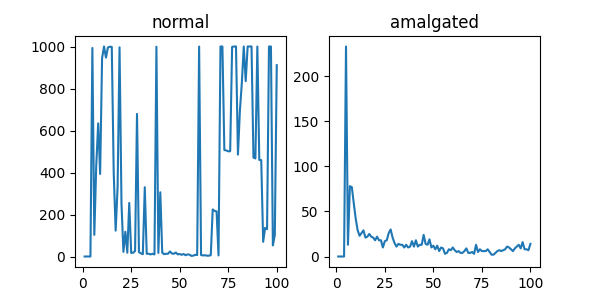

In [10]:
from_, to = 1, 101

print(newdf.shape)

changes = {}
for i in range(from_, to):
    changes[i] = sum(df[f"c{i}"] != df[f"c{i-1}"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
ax1.plot(list(changes.keys()), list(changes.values()))
ax1.set_title("normal")
changes2 = {}
for i in range(from_, to):
    changes2[i] = sum(newdf[f"c{i}"] != newdf[f"c{i-1}"])
ax2.set_title("amalgated")

ax2.plot(list(changes2.keys()), list(changes2.values()))
plt.show()

In [11]:
from time import sleep

for i in range(101):
    try:
        interaction.widget.children[0].value = i
        sleep(1.5)
    except NameError:
        break

In [14]:
# creating figure
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection="3d")
saveimage = True

def f(step=0):
    # print("communities:", len(set(getattr(newdf, f"c{step}"))))
    ax.scatter(newdf.x, newdf.y, newdf.z, c=newdf[f"c{step}"], cmap="tab20c", vmin=0)
    plt.show()
    if saveimage:
        alphabet = "abcdefghijklmnopqrstuvwxyz"
        filename = "z" * (step // len(alphabet)) + alphabet[step % 26] + str(step) + ".png"
        plt.savefig("plots/" + filename)


interaction = widgets.interact(f, step=(0, 100))



interactive(children=(IntSlider(value=0, description='step'), Output()), _dom_classes=('widget-interact',))